# Motion estimation

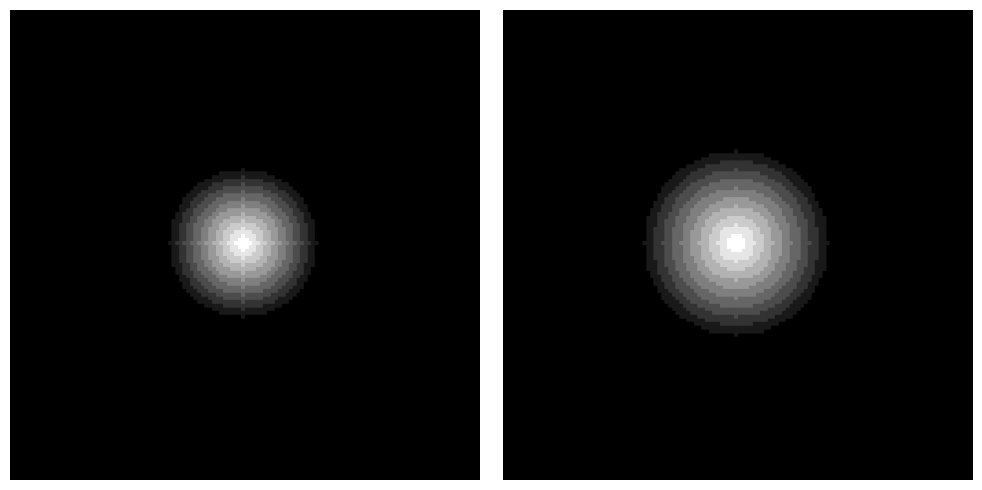

In [3]:
# Open images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time

path_1 = "images x TP's/images synthétiques/1.png"
path_2 = "images x TP's/images synthétiques/2.png"

img1 = mpimg.imread(path_1)
img2 = mpimg.imread(path_2)

def rgb_to_grayscale(img):
    R = img[..., 0]
    G = img[..., 1]
    B = img[..., 2]

    img_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    return img_gray

img1 = rgb_to_grayscale(img1)
img2 = rgb_to_grayscale(img2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img1, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img2, cmap='gray')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Function definition to visualise vectors
def visualize_motion_vectors(frame, motion_vectors, step=7, scale = 2):
    plt.figure(figsize=(12, 6))
    plt.imshow(frame, cmap='gray', alpha=0.7)

    h, w = frame.shape
    x_coords, y_coords = np.mgrid[0:h:step, 0:w:step]
    # y_coords, x_coords = np.mgrid[0:h:step, 0:w:step]/
    u = motion_vectors[::step, ::step, 0]
    v = motion_vectors[::step, ::step, 1]

    plt.quiver(
        x_coords, y_coords,
        u * scale, v * scale,
        angles='xy', scale_units='xy', scale=1,
        color='red', width=0.003
    )

    plt.axis('off')
    plt.tight_layout()
    
    plt.show()

## A - Pixel-Wise

Partant de deux frames F1 et F2 ou F2 succede a F1 dans le temps, estimez
par une methode pixel-wise les vecteurs de mouvements des pixels de la frame
F1 vers F2 (en admettant l’hypothese de l’intensite constante).

In [29]:
import math

def pixel_wise(img1: np.ndarray, img2: np.ndarray, k: int = 10):

    if img1.shape != img2.shape:
        raise Exception('Images must have the same shape.')

    h, w = img1.shape

    mv = np.array([0] * h*w*2).reshape(h,w,2)

    for x1 in range (h):
        for y1 in range(w):
            min_dx = 0
            min_dy = 0
            min_I = abs(img2[x1,y1] - img1[x1,y1])
            min_dist = math.inf

            for x2 in range(x1 - k, x1 + k):
                if x2 < 0 or x2 >= h:
                    continue
                for y2 in range(y1 - k, y1 + k):
                    if y2 < 0 or y2 >= w:
                        continue

                    I = abs(img2[x2,y2] - img1[x1,y1]) # Intensity
                    dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

                    if I < min_I or (I == min_I and dist < min_dist):
                        min_I = I
                        min_dx = x2 - x1
                        min_dy = y2 - y1
                        min_dist = dist

            mv[x1,y1] = np.array([min_dx,min_dy])
    
    return mv

Exec time : 83.81384921073914


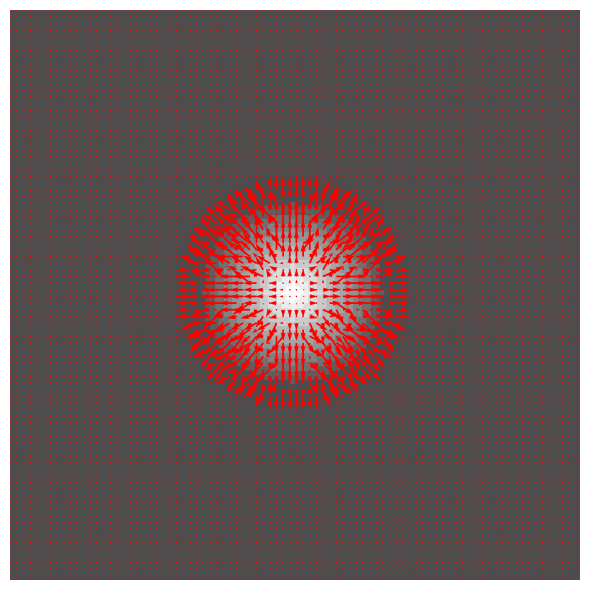

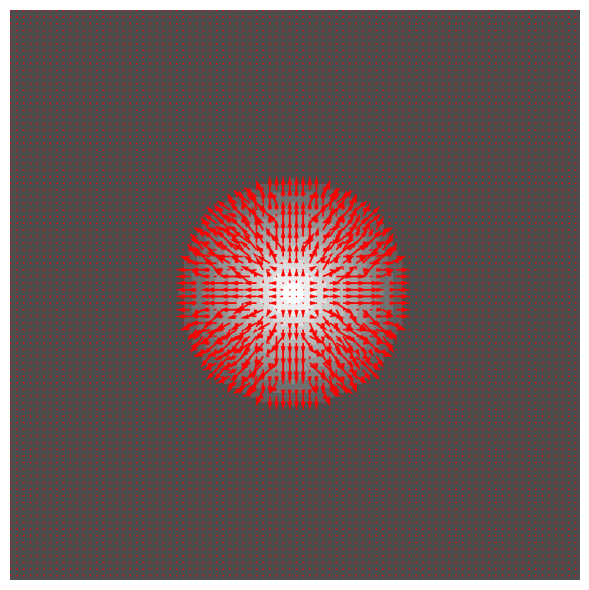

In [30]:
k = 10 # Size of neighbours pixels explored

start = time.time()
mv = pixel_wise(img1, img2, k)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

## B - BMA

Refaire cette meme estimation par blocs (BMA) pour differentes tailles
de blocs.

In [121]:
def bma(img1: np.ndarray, img2: np.ndarray, block_size: int = 16, k: int = 10):

    if img1.shape != img2.shape:
        raise Exception('Images must have the same shape.')

    h, w = img1.shape

    mv = np.array([0] * h*w*2).reshape(h,w,2)

    for x1 in range (0, h, block_size):
        if x1 < 0 or x1 + block_size >= h:
            continue
        for y1 in range(0, w, block_size):
            if y1 < 0 or y1 + block_size >= w:
                continue
            min_dx = 0
            min_dy = 0
            min_I = np.sum(abs(img2[x1 : x1 + block_size, y1 : y1 + block_size] - img1[x1 : x1 + block_size, y1 : y1 + block_size]))
            min_dist = math.inf

            for x2 in range(x1 - k, x1 + k):
                if x2 < 0 or x2 + block_size >= h:
                    continue
                for y2 in range(y1 - k, y1 + k):
                    if y2 < 0 or y2 + block_size >= w:
                        continue

                    I = np.sum(abs(img2[x2 : x2 + block_size, y2 : y2 + block_size] - img1[x1 : x1 + block_size, y1 : y1 + block_size])) # Intensity
                    dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

                    if I < min_I or (I == min_I and dist < min_dist):
                        min_I = I
                        min_dx = x2 - x1
                        min_dy = y2 - y1
                        min_dist = dist

            # mv[x1 + block_size // 2, y1 + block_size // 2] = np.array([min_dx ,min_dy]) # Setting only a vector in the middle pixel of the block
            mv[x1: x1 + block_size, y1: y1 + block_size] = [np.array([min_dx ,min_dy]) for _ in range(block_size)] # Setting all pixels of the block by the motion vector

    return mv

Exec time : 22.188008785247803


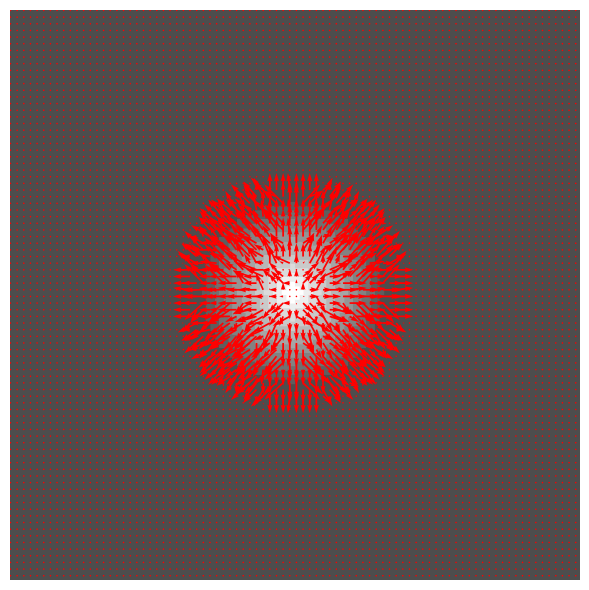

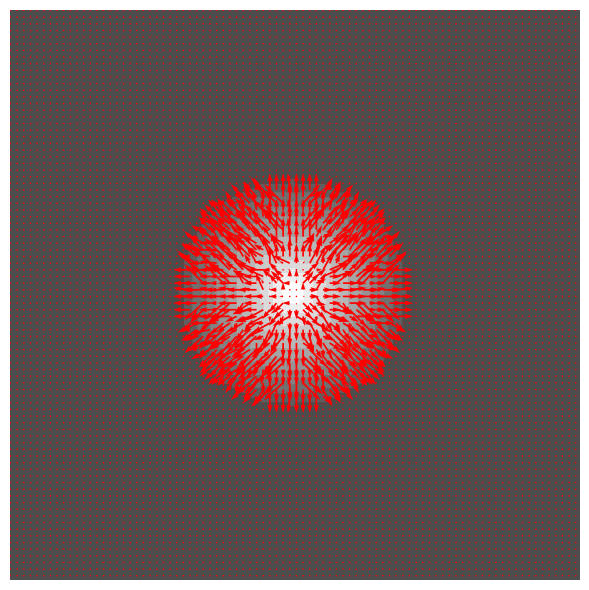

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 4 # 4x4

start = time.time()
mv = bma(img1, img2, block_size, k)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 5.6825737953186035


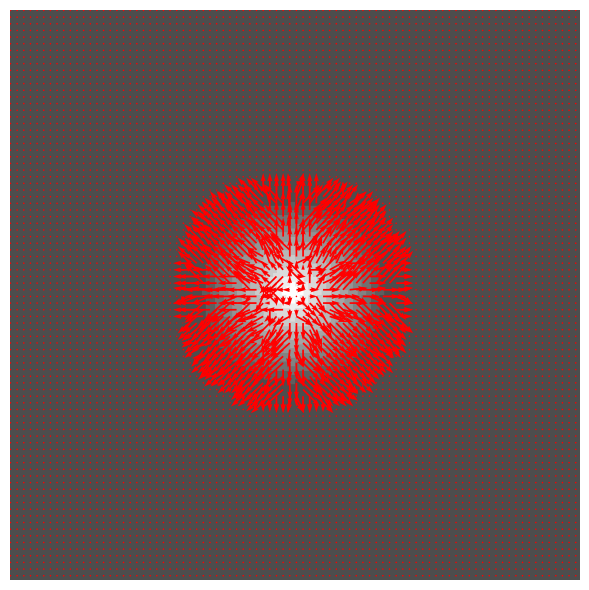

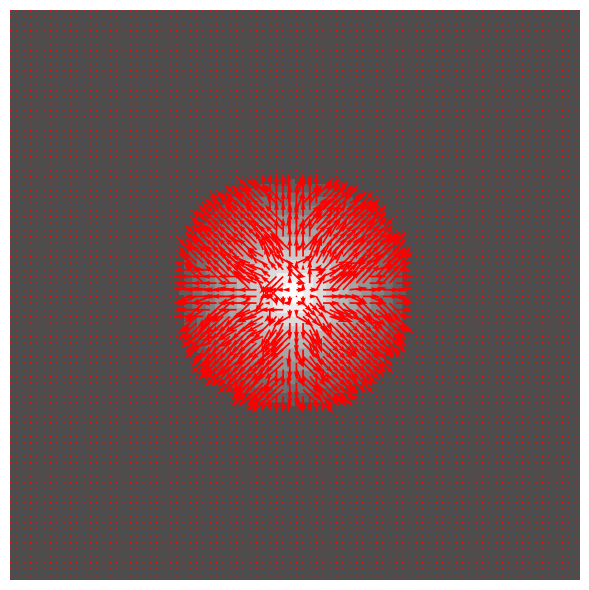

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 8 # 8x8

start = time.time()
mv = bma(img1, img2, block_size, k)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 1.471440076828003


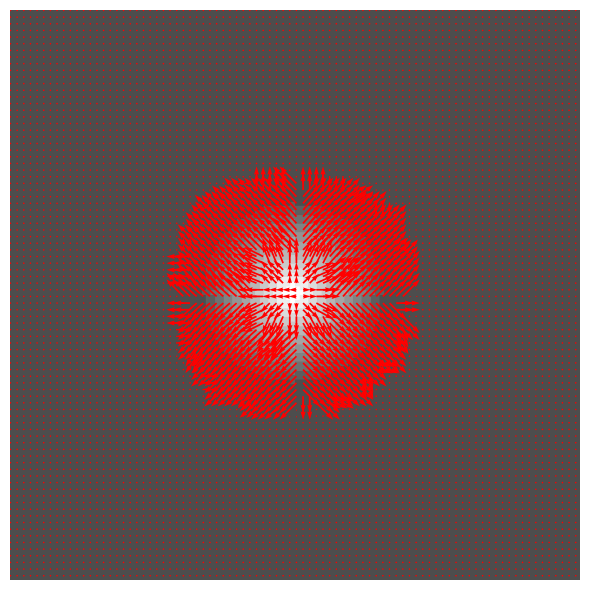

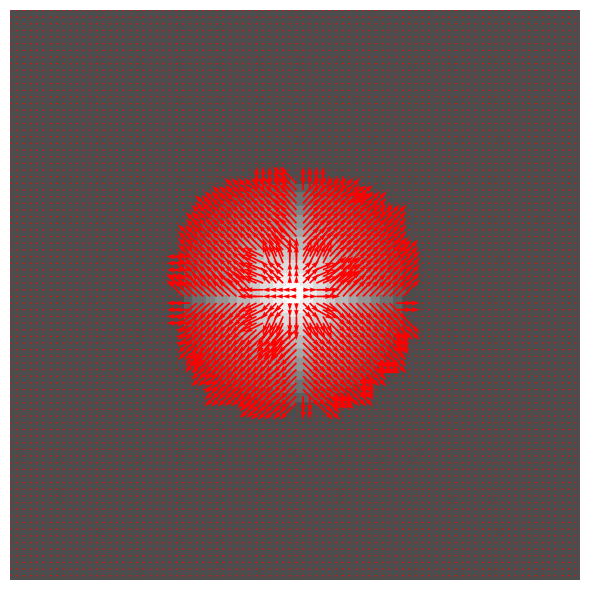

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16

start = time.time()
mv = bma(img1, img2, block_size, k)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 0.3945000171661377


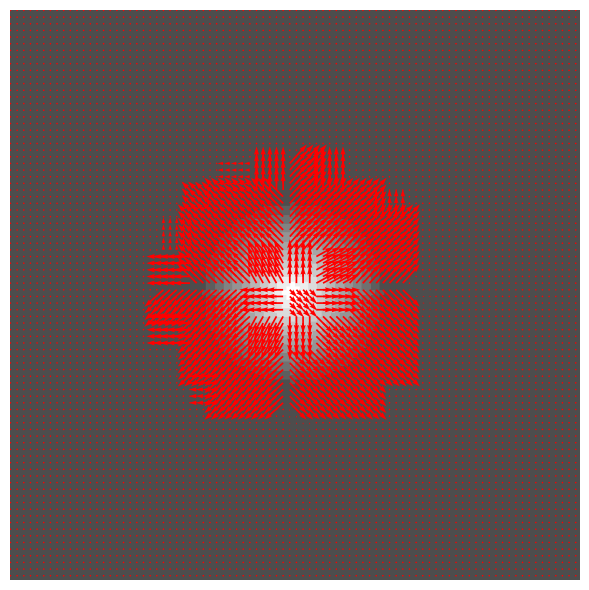

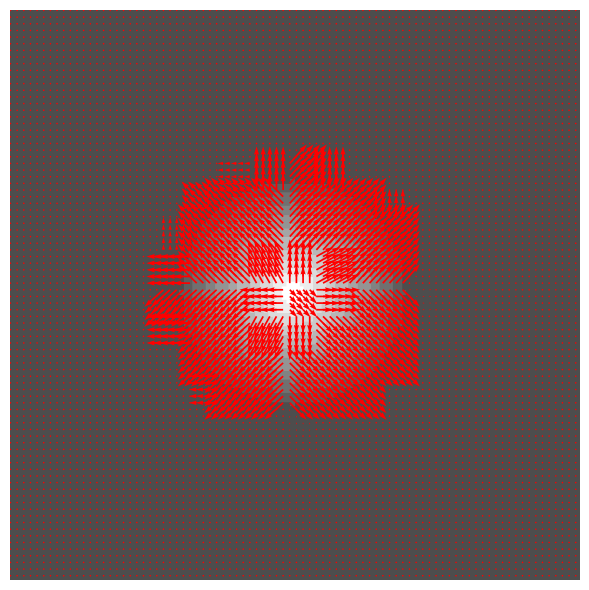

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 32 # 32x32

start = time.time()
mv = bma(img1, img2, block_size, k)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

## C - Deduction

Que déduisez-vous des deux premières questions ? (régularité du champ
de vecteurs de mouvement vs. taille des blocs).   
<br><br>
L’estimation pixel-wise (méthode A) fournit un champ de vecteurs très détaillé. On observe cependant un bruit important, les vecteurs sont beaucoup moins réguliers sur les diagonales. Cette irrégularité peut être liée au fait que chaque pixel a son propre vecteur, sans contrainte de cohérence locale. De plus, le temps d'exécution est de ~1m23.  

En revanche, les méthodes par blocs (méthode B) introduisent une régularité croissante du champ lorsque la taille des blocs augmente :  

- Avec des blocs 4×4, le champ est encore très fin, proche de la méthode pixel-wise, mais beaucoup plus rapide en exécution. Le champ reste bruité et on observe une forte irrégularité au centre. Temps d'exécution : ~21sec.  

- Avec des blocs 8×8, le champ devient plus lisse et régulier sur les diagonales, sans perte majeure d’information. On continue tout de même d'observer des variations et irrégularités similaires au blocks de 4x4. C’est un bon compromis, d'autant plus que le temps d'exécution est relativement court.   Temps d'exécution : ~5sec.  

- Avec des blocs 16×16, le champ devient encore plus régulier et on observe des vecteurs bien droits, mais on commence à perdre en précision locale : des zones du disque semblent se déplacer de façon uniforme (notamment sur les diagonales) alors que le gradient du mouvement est en réalité plus complexe. Temps d'exécution : ~1.5sec.  

- Avec des blocs 32×32, le champ est très régulier, presque uniforme par endroits, mais il lisse complètement les détails du mouvement. Cette taille impose donc une trop forte contrainte de régularité. Temps d'exécution : ~0.4sec.  


**Conclusions:**    

On observe un compromis clair entre régularité du champ de mouvement et précision :  

- Les blocs de petites tailles ou encore le pixel-wise offrent plus de précision, mais un champ plus bruité et très irrégulier. 

- Les plus grands blocs comme le 8x8 ou 16x16 offrent un champ plus régulier et laissent apparaitre un début d'uniformisation du mouvement, notamment sur les diagonales, la rapidité de traitement est notable comparée à la méthode pixel-wise. Cependant, on constate tout de même une perde de détails avec l'augmentation de la taille du bloc, c'est pourquoi 8x8 semble être le meilleur compromis sur de nombreux points.  

- Les trop gros blocs laissent échapper trop de détails et on manque clairement de l'information.  

## D.1 - Régularisation
Rajoutez une méthode de régularisation du champ de vecteurs de
mouvement de votre choix parmi les méthodes du cours et discutez pour quelles
valeurs de coefficients le champ de vecteurs obtenu semble plus correspondre
au flot optique.

In [115]:
def bma_regularized(img1: np.ndarray, img2: np.ndarray, block_size: int = 16, k: int = 10, ws: float = 0.2):

    if img1.shape != img2.shape:
        raise Exception('Images must have the same shape.')

    h, w = img1.shape

    mv = np.array([0] * h*w*2).reshape(h,w,2)

    for x1 in range (0, h, block_size):
        if x1 < 0 or x1 + block_size >= h:
            continue
        for y1 in range(0, w, block_size):
            if y1 < 0 or y1 + block_size >= w:
                continue
            min_dx = 0
            min_dy = 0
            min_I = np.sum(abs(img2[x1 : x1 + block_size, y1 : y1 + block_size] - img1[x1 : x1 + block_size, y1 : y1 + block_size]))
            min_dist = math.inf

            for x2 in range(x1 - k, x1 + k):
                if x2 < 0 or x2 + block_size >= h:
                    continue
                for y2 in range(y1 - k, y1 + k):
                    if y2 < 0 or y2 + block_size >= w:
                        continue

                    I = np.sum(abs(img2[x2 : x2 + block_size, y2 : y2 + block_size] - img1[x1 : x1 + block_size, y1 : y1 + block_size])) # Intensity
                    dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

                    # Regularisation term from neighbors
                    neighbors = []
                    for dx, dy in [(-block_size,0), (block_size,0), (0,-block_size), (0,block_size)]:
                        nx, ny = x1 + dx, y1 + dy
                        if 0 <= nx < h and 0 <= ny < w:
                            neighbors.append(mv[nx, ny])

                    if neighbors:
                        avg_mv = np.mean(neighbors, axis=0)
                        reg_term = np.sum((np.array([x2 - x1, y2 - y1]) - avg_mv)**2)
                    else:
                        reg_term = 0.0

                    I = I + ws * reg_term

                    if I < min_I or (I == min_I and dist < min_dist):
                        min_I = I
                        min_dx = x2 - x1
                        min_dy = y2 - y1
                        min_dist = dist

            mv[x1: x1 + block_size, y1: y1 + block_size] = [np.array([min_dx ,min_dy]) for _ in range(block_size)] # Setting all pixels of the block by the motion vector

    return mv

Exec time : 4.444541931152344


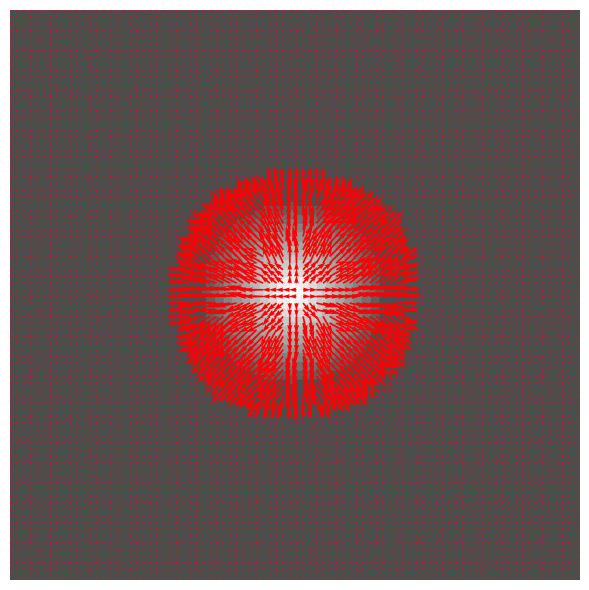

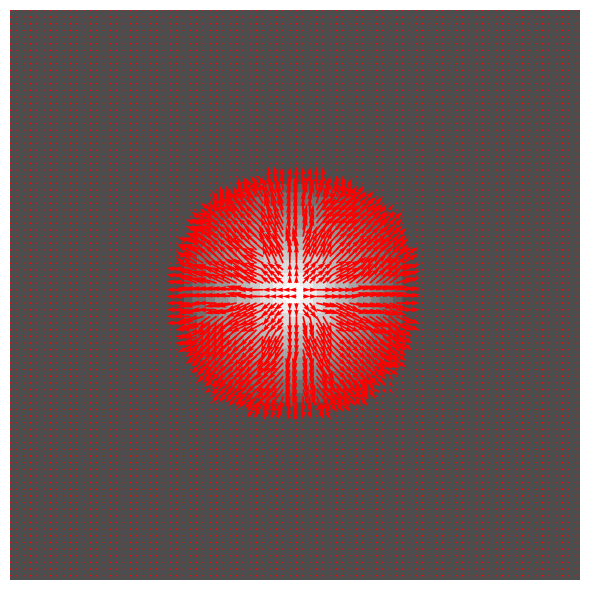

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16
ws = 0.1 # weight of regularisation

start = time.time()
mv = bma_regularized(img1, img2, block_size, k, ws)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 4.4224090576171875


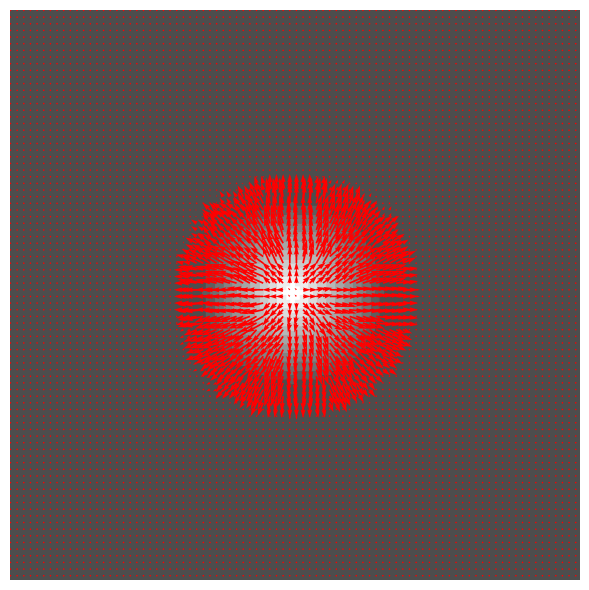

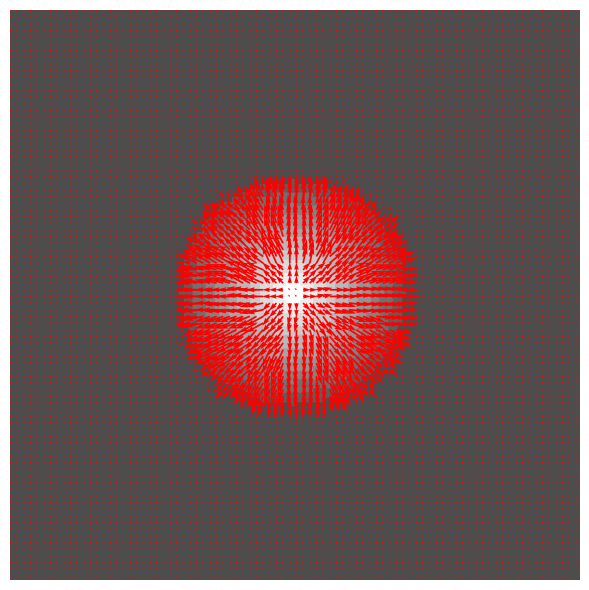

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16
ws = 0.2 # weight of regularisation

start = time.time()
mv = bma_regularized(img1, img2, block_size, k, ws)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 4.456594944000244


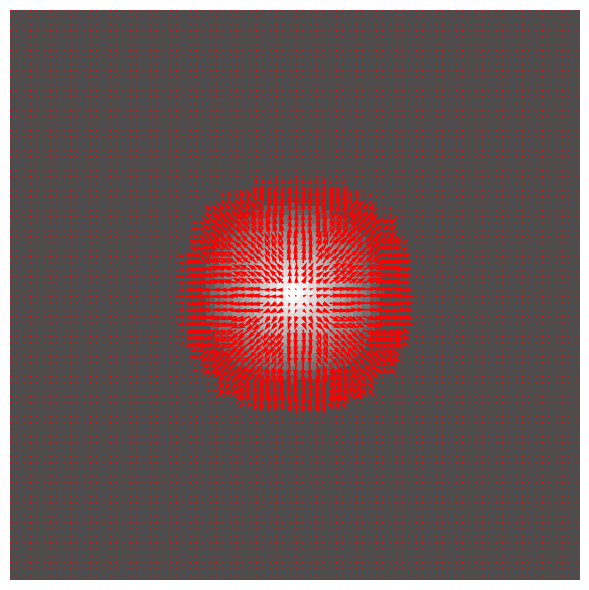

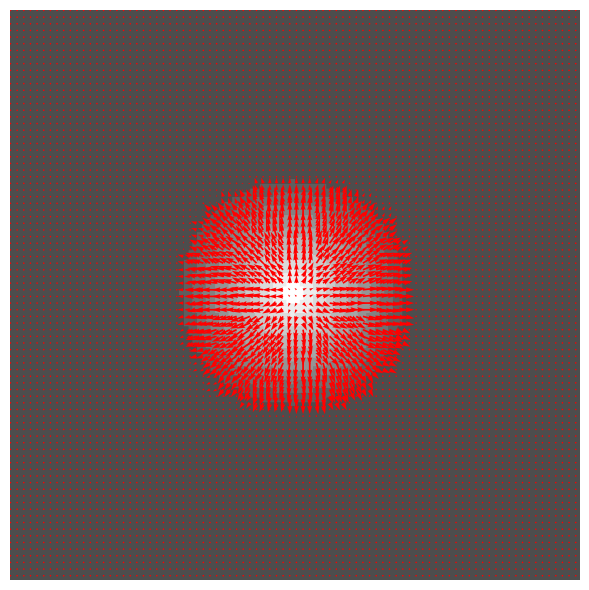

In [ ]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16
ws = 0.3 # weight of regularisation

start = time.time()
mv = bma_regularized(img1, img2, block_size, k, ws)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Exec time : 4.529603004455566


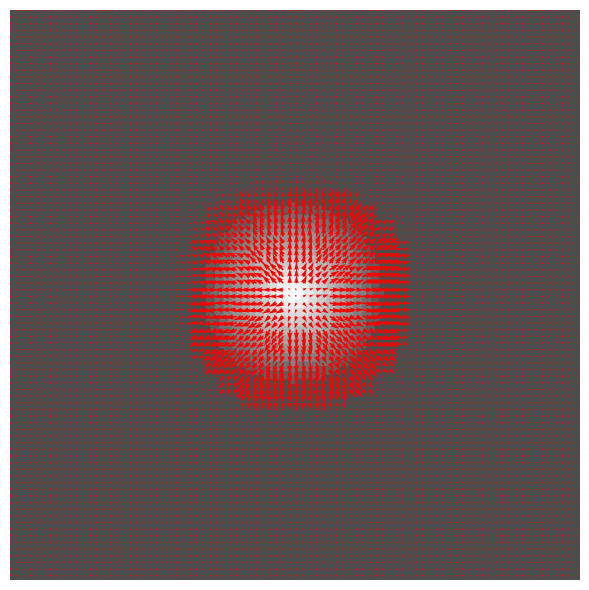

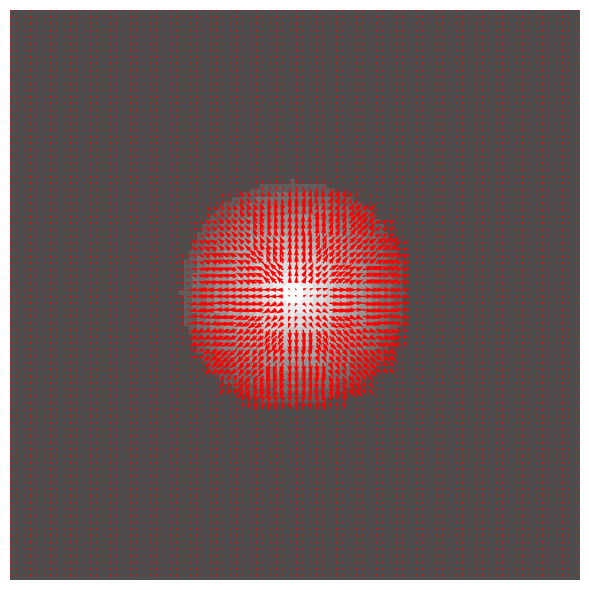

In [119]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16
ws = 0.4 # weight of regularisation

start = time.time()
mv = bma_regularized(img1, img2, block_size, k, ws)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

On constate que l'appliquation d'une contrainte de lissage en utilisant les voisins déja estimés au cours de la recherche augmente considérablement la qualité et la régularité du champ de vecteur. Cependant, si on accords trop d'importence a cette régularité on introduit une perte d'information. On constate que le meilleur résultat semble être obtenu avec un poids de 0.2 pour la régularisation.

In [24]:
from scipy.ndimage import gaussian_filter


def regularize_gaussian(mv: np.ndarray, sigma: float = 1.0):
    mv_dx = gaussian_filter(mv[...,0], sigma=sigma)
    mv_dy = gaussian_filter(mv[...,1], sigma=sigma)
    return np.stack((mv_dx, mv_dy), axis=-1)

Exec time : 1.438542127609253


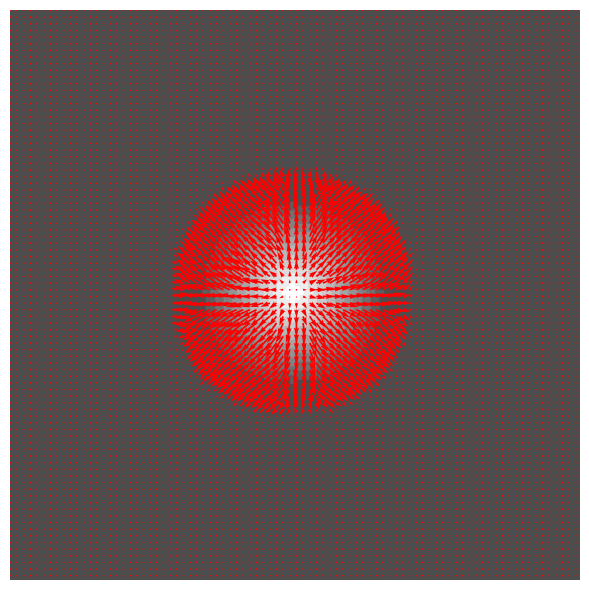

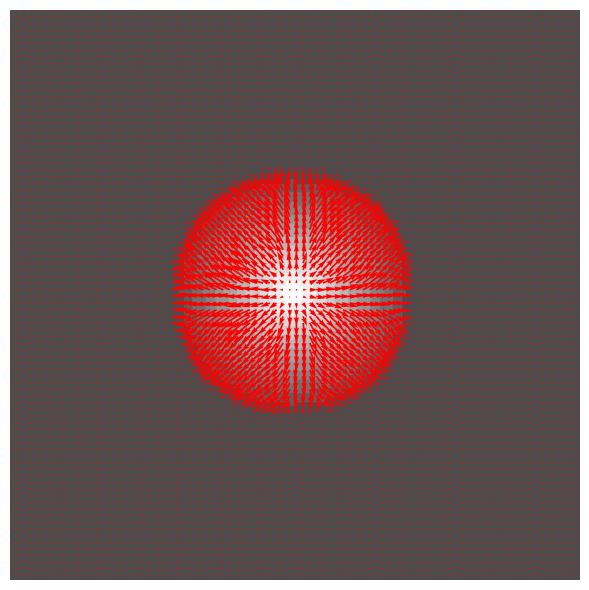

In [127]:
k = 10 # Size of neighbours pixels explored
block_size = 16 # 16x16
ws = 15.0 # weight of regularisation

start = time.time()
mv = bma(img1, img2, block_size, k)
mv_regularized = regularize_gaussian(mv, ws)
print(f'Exec time : {time.time() - start}')

visualize_motion_vectors(img1, mv_regularized)
visualize_motion_vectors(img2, mv_regularized)

On peut aussi essayer un lissage gaussien appliqué directement après le BMA classique. On constate que celui-ci offre une regularisation de très grande qualité, c'est pourquoi nous considèrereons plutot cette approche pour la suite.

## D.2 - Node-Based

Refaites une estimation de mouvement mais cette fois-ci en node-based
(sans et avec régularisation). Qu’observez vous par rapport a la méthode par
blocs ?

L'implementation suivante s'appuie sur l'algorithme suivant :  
<br>

1- decomposition en blocs {B_i}_i dans le domaine de I1. 
<br>
<br>
2 - pour chaque bloc B de {B_i}_i , on fait :  
<br>
a) d1 = (0,0), d2 = (0,0), d3 = (0,0), d4 = (0,0) (initialisation) (8 param / bloc)  
<br>    
b) E = somme pour x dans B de (I2 (x + d) - I1 (x))^2
    avec d - somme pour k dans [1,4] de phi_k(x).d_k 
    ou phi_1(x) = (x_max - x)(y_max - y) / cste
    ou phi_2(x) = (x - x_min)(y_max - y) / cste
    ou phi_3(x) = (x_max - x)(y - y_min) / cste
    ou phi_4(x) = (x - x_min)(y - y_min) / cste
    et cste = (x_max - x_min).(y_max - y_min)  
<br>    
c) Descente de grad sur les 8 params :
    pour p dans {d^x_1, d^y_1, ..., d^x_4, d^y_4}
    dE(d)/dp_l = (E(d + h sur l eme compo) - E(d)) / h
    p_l = p_l - mu * dE(d)/dp_l

In [ ]:
import numpy as np

# Following formula
def bilinear_interpolate(img: np.ndarray, rows: np.ndarray, cols: np.ndarray):
    h, w = img.shape

    r0 = np.floor(rows).astype(int)
    c0 = np.floor(cols).astype(int)
    r1 = np.clip(r0 + 1, 0, h-1)
    c1 = np.clip(c0 + 1, 0, w-1)
    r0 = np.clip(r0, 0, h-1)
    c0 = np.clip(c0, 0, w-1)
    Ia = img[r0, c0]
    Ib = img[r0, c1]
    Ic = img[r1, c0]
    Id = img[r1, c1]
    wa = (r1 - rows) * (c1 - cols)
    wb = (r1 - rows) * (cols - c0)
    wc = (rows - r0) * (c1 - cols)
    wd = (rows - r0) * (cols - c0)
    return wa*Ia + wb*Ib + wc*Ic + wd*Id


def node_based_block_matching(
    img1: np.ndarray,
    img2: np.ndarray,
    block_size: int = 16,
    num_iters: int = 10,
    mu: float = 5,
    h_step: float = 8
):

    h, w = img1.shape
    mv = np.zeros((h, w, 2), dtype=np.float32)

    for x0 in range(0, h, block_size):
        if x0 + block_size > h:
            continue
        for y0 in range(0, w, block_size):
            if y0 + block_size > w:
                continue

            x_min, x_max = x0, x0 + block_size - 1
            y_min, y_max = y0, y0 + block_size - 1
            cste = (x_max - x_min) * (y_max - y_min)

            xs = np.arange(x_min, x_min + block_size)
            ys = np.arange(y_min, y_min + block_size)
            X, Y = np.meshgrid(xs, ys, indexing='ij')  # (block_size, block_size)

            phi1 = ((x_max - X) * (y_max - Y)) / cste
            phi2 = ((X - x_min) * (y_max - Y)) / cste
            phi3 = ((x_max - X) * (Y - y_min)) / cste
            phi4 = ((X - x_min) * (Y - y_min)) / cste
            phis = [phi1, phi2, phi3, phi4]

            d = np.zeros(8, dtype=np.float32)

            I1_block = img1[x0:x0+block_size, y0:y0+block_size]

            # Gradient Descent
            for _ in range(num_iters):

                dx = sum(d[2*k]   * phis[k] for k in range(4))
                dy = sum(d[2*k+1] * phis[k] for k in range(4))
                I2_warp = bilinear_interpolate(img2, X + dx, Y + dy)
                E = np.sum((I2_warp - I1_block)**2)

                grad = np.zeros_like(d)
                for l in range(8):
                    d_plus = d.copy()
                    d_plus[l] += h_step
                    dx_p = sum(d_plus[2*k]   * phis[k] for k in range(4))
                    dy_p = sum(d_plus[2*k+1] * phis[k] for k in range(4))
                    I2_p = bilinear_interpolate(img2, X + dx_p, Y + dy_p)
                    E_p = np.sum((I2_p - I1_block)**2)
                    grad[l] = (E_p - E) / h_step

                d -= mu * grad

            mv[x0:x0+block_size, y0:y0+block_size, 0] = dx
            mv[x0:x0+block_size, y0:y0+block_size, 1] = dy

    return mv

Exec time : 4.351779937744141


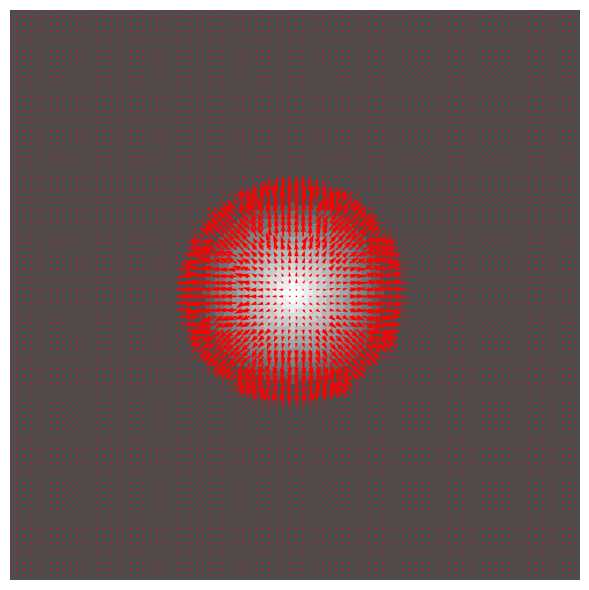

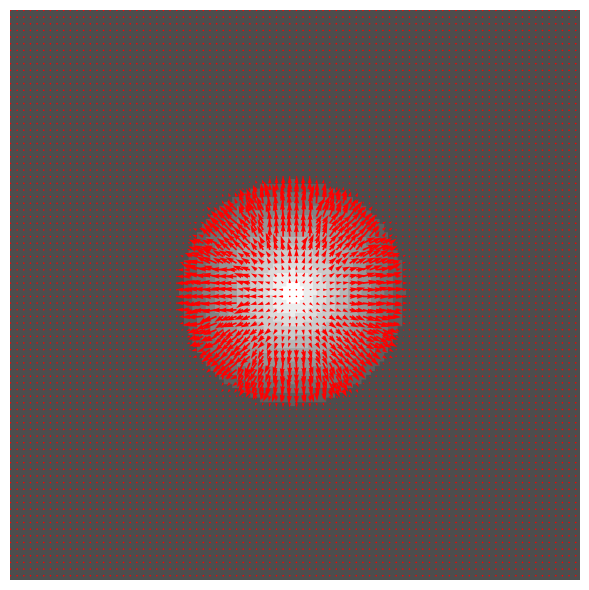

In [64]:
start = time.time()
mv = node_based_block_matching(img1, img2)
print(f'Exec time : {time.time() - start}')
visualize_motion_vectors(img1, mv)
visualize_motion_vectors(img2, mv)

Avec une petite recherche d'hyperparamètres on constate de bons résultats, bien plus satisfaisants que pour la méthode par blocs classique.  

Dans la méthode par blocs, on constate un champ de vecteurs constant à l’intérieur de chaque bloc, et des discontinuités nettes aux frontières de blocs. Dans la methode node-based, le champ est beaucoup plus régulier et un déplacement qui varie en douceur, avec des transitions continues d’un bloc à l’autre. On fait disparaitre l'effet 'escaliers' des blocs.  

De plus, la methode par noeuds offre également un décalage réel offrand une précision plus précise que le pixel. On le constate par le fait que la sphère de l'image est bien englobée.  

Le seul bémol est la descente de gradient qui peut être plus coûteuse. Cependant, dans notre cas une recherche d'hyperparamètres relativement simple permet de garder le même temps d'exécution tout en augmentant considérablement la qualité du rendu. L'important est de ne pas avoir trop d'itération pour la descente de gradient.

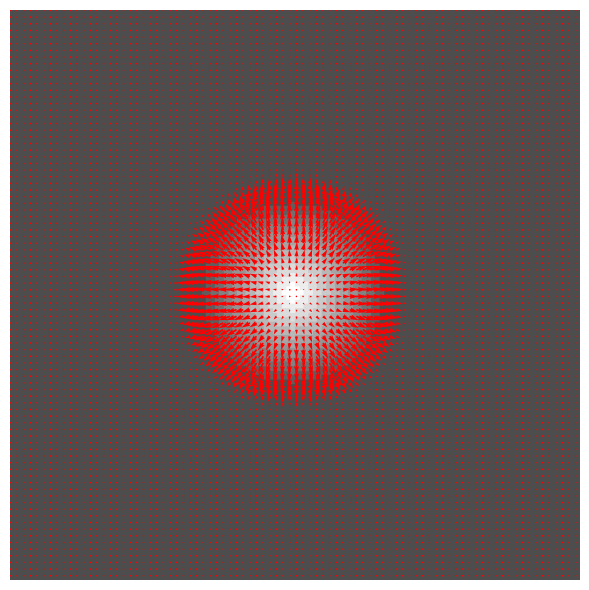

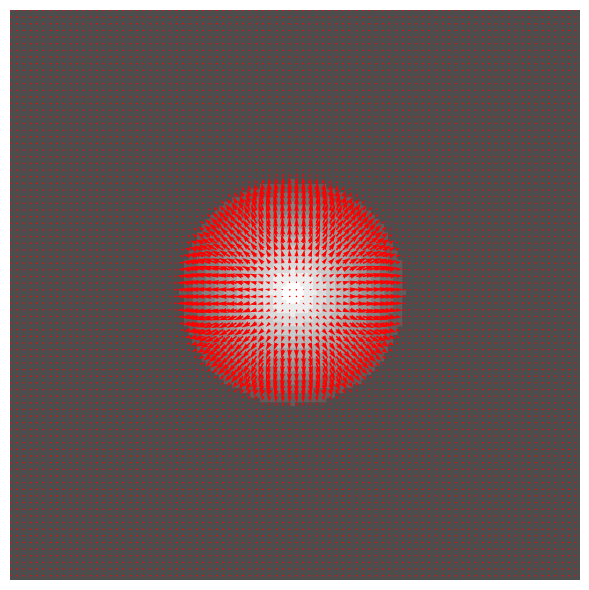

In [65]:
mv_regularized = regularize_gaussian(mv, sigma=10)

visualize_motion_vectors(img1, mv_regularized)
visualize_motion_vectors(img2, mv_regularized)

Encore une fois l'ajout de la régularisation lisse le résultat et permet une très bonne uniformisation du mouvement, en particulier en périférie de de la sphère. Le résultat est par ailleurs beaucoup moins saccadé que la méthode par blocs.